In [33]:

import tensorflow
import numpy

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt

from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist


numpy.random.seed(42)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [19]:
x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train /= 255

y_train = np_utils.to_categorical(y_train, 10)


In [22]:
model = Sequential()

model.add(Dense(800, input_dim = 784, init = "normal", activation = "relu"))
model.add(Dense(10, init = "normal", activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(800, input_dim=784, activation="relu", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  after removing the cwd from sys.path.


In [23]:
model.fit(x_train, y_train, batch_size = 200, nb_epoch = 100, verbose = 1)

/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
60000/60000 [==============================] - 15s 244us/step - loss: 1.2067 - acc: 0.7226
Epoch 2/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.6028 - acc: 0.8584
Epoch 3/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.4762 - acc: 0.8796
Epoch 4/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.4182 - acc: 0.8909
Epoch 5/100
60000/60000 [==============================] - 10s 171us/step - loss: 0.3836 - acc: 0.8978
Epoch 6/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.3596 - acc: 0.9030
Epoch 7/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.3417 - acc: 0.9069
Epoch 8/100
60000/60000 [==============================] - 11s 178us/step - loss: 0.3273 - acc: 0.9106
Epoch 9/100
60000/60000 [==============================] - 11s 184us/step - loss:

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


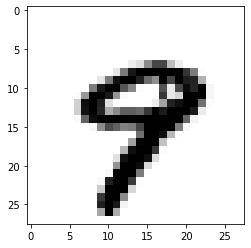

In [78]:
image_index = 9
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 784))
print(pred)